In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
data=pd.read_csv('complaints.csv')
data.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14428\856359813.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Personal information incorrect,NaN,NaN,"EQUIFAX, INC.",TX,77028,NaN,NaN,Web,2023-08-26,Closed with non-monetary relief,Yes,NaN,7563315
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",NY,12110,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7563316
2,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,32808,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7563317
3,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
4,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160


In [3]:
data.shape

(4082544, 18)

In [4]:
data['Product'].nunique()

21

In [5]:
data2=data[['Consumer complaint narrative','Product']]
print('Shape of data',data2.shape)

Shape of data (4082544, 2)


In [6]:
data2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other', 
              'Credit reporting':'Credit reporting, repair, or other',
              'Credit reporting or other personal consumer reports':'Credit reporting, repair, or other',
             'Payday loan': 'Payday loan, title loan, or personal loan',
              'Credit card': 'Credit card or prepaid card',
              'Prepaid card':'Credit card or prepaid card',
              'Payday loan, title loan, personal loan, or advance loan':'Payday loan, title loan, or personal loan',
             'Money transfers': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)



data2 = data2[(data2['Product'] == 'Credit reporting, repair, or other') | \
                             (data2['Product'] == 'Debt collection') | \
                             (data2['Product'] == 'Mortgage') | \
                             (data2['Product'] == 'Consumer Loan')
                            ]

unique_values = ['Credit reporting, repair, or other','Debt collection','Consumer Loan','Mortgage']
unique_df = pd.DataFrame({'u': unique_values})
print(unique_df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14428\4089095996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace({'Product':


                                    u
0  Credit reporting, repair, or other
1                     Debt collection
2                       Consumer Loan
3                            Mortgage


In [7]:
print('Before dropping the nulls')
display('Null count', data2.isna().sum())
print('Total rows of data', len(data2))
data2.dropna(inplace=True)
print('='*80)
print('After dropping the nulls')
display('Null count', data2.isna().sum())
print('Total rows of data', len(data2))

Before dropping the nulls


'Null count'

Consumer complaint narrative    2139652
Product                               0
dtype: int64

Total rows of data 3286606
After dropping the nulls


'Null count'

Consumer complaint narrative    0
Product                         0
dtype: int64

Total rows of data 1146954


In [8]:
data2=data2.sample(1500,random_state=1).copy()
display(data2.head())
display(data2.tail())

,Consumer complaint narrative,Product
3824838,In 2019 as I was looking for a way to tap my h...,Mortgage
3356473,Complaint against Experian Credit Bureau regar...,"Credit reporting, repair, or other"
3253964,my name is XXXX XXXX reached out to EXPERIAN/T...,"Credit reporting, repair, or other"
1893232,after get a letter informing me about my prope...,Mortgage
1131561,I have been trying to work with the Credit com...,"Credit reporting, repair, or other"


,Consumer complaint narrative,Product
3302821,I have submitted multiple disputes regarding t...,"Credit reporting, repair, or other"
1492757,Case XXXX XXXX University COLLECTIONS DEPARTME...,"Credit reporting, repair, or other"
1353904,My name is XXXX XXXX XXXX this complaint is no...,"Credit reporting, repair, or other"
1164536,I am a confused consumer because I filed a dis...,"Credit reporting, repair, or other"
2809525,I am writing to report that I have been a vict...,"Credit reporting, repair, or other"


In [9]:
data2.shape

(1500, 2)

In [10]:
data2['Product'].unique()

array(['Mortgage', 'Credit reporting, repair, or other',
       'Debt collection', 'Consumer Loan'], dtype=object)

In [11]:
data2['Product'].value_counts()

Credit reporting, repair, or other    1042
Debt collection                        296
Mortgage                               147
Consumer Loan                           15
Name: Product, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
                                            data2['Consumer complaint narrative'], data2['Product'],
                                            test_size=0.25, random_state=0, stratify=data2['Product'])
print(f'Training data: {len(X_train)}')
print(f'Testing data: {len(X_test)}')


Training data: 1125
Testing data: 375


In [13]:
display(y_train.value_counts())

Credit reporting, repair, or other    782
Debt collection                       222
Mortgage                              110
Consumer Loan                          11
Name: Product, dtype: int64

In [14]:
display(X_train.value_counts())

My name is XXXX XXXX XXXX this complaint is not made in error neither is it being made by a third party.I declare under penalty of perjury I am alleging that a person or company- without my authorization- from unauthorized use of my social security number and card used my personal identifying information to apply for goods, services, or money ; and, was successful in creating some accounts. I have no knowledge of this and All is being investigated by the FTC.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [15]:
display(y_test.value_counts())

Credit reporting, repair, or other    260
Debt collection                        74
Mortgage                               37
Consumer Loan                           4
Name: Product, dtype: int64

In [16]:
display(X_test.value_counts())

I have tried to send my disputes to the major credit bureaus but are having difficulties in submitting my disputes and getting the inaccurate information corrected on my credit report.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [17]:
vectorizer = TfidfVectorizer(stop_words= 'english')
# convert the documents into a matrix
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)
X_train_vec, X_test_vec

(<1125x6536 sparse matrix of type '<class 'numpy.float64'>'
 	with 57218 stored elements in Compressed Sparse Row format>,
 <375x6536 sparse matrix of type '<class 'numpy.float64'>'
 	with 16139 stored elements in Compressed Sparse Row format>)

In [18]:
from sklearn.feature_selection import SelectKBest, chi2

n_features=100

ch2 = SelectKBest(chi2, k=n_features)
X_train_sp = ch2.fit_transform(X_train_vec, y_train)
X_test_sp  = ch2.transform(X_test_vec)

X_train_sp, X_test_sp

# Converting the sparse matrix to a dense one to visualize it.

cols = list(range(n_features))

X_train_dense = pd.DataFrame(data=X_train_sp.toarray(), columns=cols)
X_test_dense  = pd.DataFrame(data=X_test_sp.toarray(), columns=cols)
print(X_train_dense.shape, X_test_dense.shape)
X_train_dense

(1125, 100) (375, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.112746,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.031287,0.0,0.0,0.0,0.0,0.0,0.0
1121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.097445,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Now we have train and test data as vectors
# Let us also convert the target data appropriately


encoder = LabelEncoder()
y_train_num  = encoder.fit_transform(y_train)
y_test_num   = encoder.transform(y_test)
y_train_num.min(), y_train_num.max(), y_test_num.min(), y_test_num.max() # sanity check
mapping = {l: i for i, l in enumerate(encoder.classes_)}
mapping

{'Consumer Loan': 0,
 'Credit reporting, repair, or other': 1,
 'Debt collection': 2,
 'Mortgage': 3}

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Create a Linear SVM classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Perform cross-validation
scores = cross_val_score(svm_model, X_train_dense, y_train_num, cv=5, n_jobs=-1, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy = np.mean(scores)

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.7946666666666667


In [21]:
from sklearn.metrics import accuracy_score
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the SVM model to the training data
svm_model.fit(X_train_dense, y_train_num)
preds = svm_model.predict(X_test_dense)
accuracy = accuracy_score(y_test_num, preds)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.7946666666666666


In [22]:
preds[0]

1

In [23]:
preds=encoder.inverse_transform(preds)
preds[0]

'Credit reporting, repair, or other'

In [24]:
rf_model  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs = -1)
scores1 = cross_val_score(rf_model,
                         X_train_dense,
                         y_train_num,
                         cv=5,
                         n_jobs = -1,
                         scoring = 'accuracy')
scores1.mean()
# Calculate the mean accuracy
mean_accuracy2 = np.mean(scores1)

# Print the mean accuracy
print("Mean Accuracy:", mean_accuracy2)

Mean Accuracy: 0.8355555555555556


In [25]:
rf_model.fit(X_train_dense, y_train_num)
preds1=rf_model.predict(X_test_dense)
accuracy2 = accuracy_score(y_test_num, preds1)
print("Accuracy on test set:", accuracy2)

Accuracy on test set: 0.8293333333333334


In [26]:
preds1[0]

2

In [27]:
preds1=encoder.inverse_transform(preds1)
preds1[0]

'Debt collection'

#LinearSVM

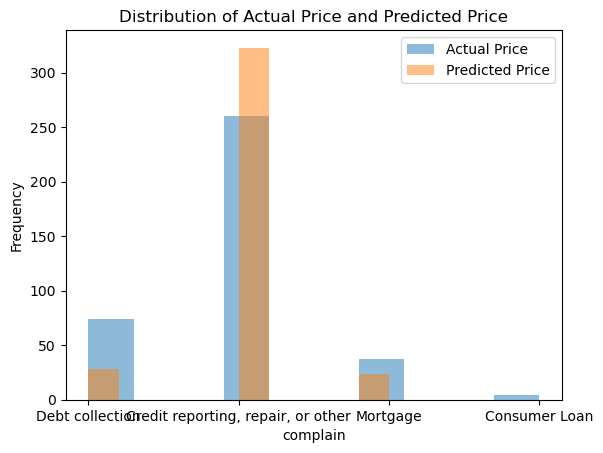

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(y_test, bins=10, alpha=0.5, label='Actual Price')
plt.hist(preds, bins=10, alpha=0.5, label='Predicted Price')
plt.xlabel('complain')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Price and Predicted Price')
plt.legend()
plt.show()

#Random forest

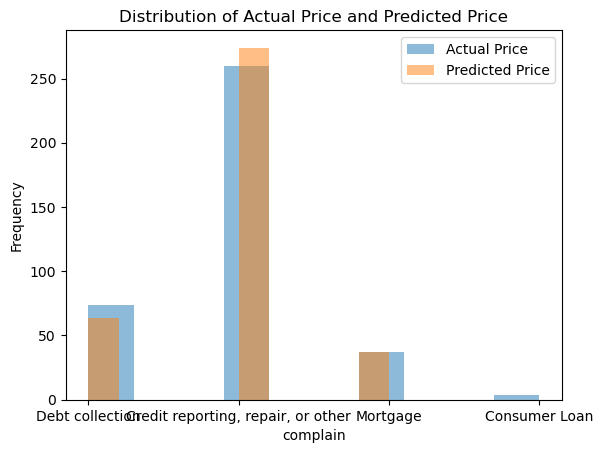

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(y_test, bins=10, alpha=0.5, label='Actual Price')
plt.hist(preds1, bins=10, alpha=0.5, label='Predicted Price')
plt.xlabel('complain')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Price and Predicted Price')
plt.legend()
plt.show()

#So from above we can say Random forest gives the best

In [30]:
report = pd.DataFrame(columns=['Complaint','Actual Product','Prediction'])
report['Complaint']      = X_test
report['Actual Product'] = y_test
report['Prediction']     = preds1
report['Correct'] = (report['Actual Product'] == report['Prediction']).astype('int')
display(report)
print(f'Accuracy: {100*report.Correct.sum()/report.Correct.count()} %')

,Complaint,Actual Product,Prediction,Correct
361620,I have a medical bill from XXXX XXXX XXXX from...,Debt collection,Debt collection,1
1016794,Someone got care credit in my name and also go...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
1024905,In accordance with the Fair Credit Reporting e...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
2158031,fraudulent accounts were listed on my consumer...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
2780311,This is my third request that I have been a vi...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
...,...,...,...,...
2500982,"XXXX XXXX XXXX XXXX XXXX, XXXX XXXX And COMMON...",Debt collection,Debt collection,1
55673,I want this late payment deleted from my accou...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1
3712463,I received a letter in the mail regarding a co...,Debt collection,Debt collection,1
801044,I have rights under 15 usc 1681. \nEquifax is ...,"Credit reporting, repair, or other","Credit reporting, repair, or other",1


Accuracy: 82.93333333333334 %


In [31]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,labels,size=10, rotate_labels=False):
    '''
    This function receives a confusion matrix object and plots it out using seaborn
    '''
    
    font_specs = {"size": 20, 'fontweight':'bold'}
    title_specs= {"size": 16, 'fontweight':'bold'}
    figsize = size
    fig, ax = plt.subplots(figsize = (figsize,figsize), facecolor = '#ebebeb', frameon = True, edgecolor = 'black')
    ax = sns.heatmap(cm,annot=True, cbar = False, cmap = 'Greens',linewidths=5,
                  linecolor='#ebebeb', annot_kws=font_specs, fmt='g')
    plt.xlabel('Predicted', fontdict = font_specs, labelpad=-(figsize*65))
    plt.ylabel('Actual', fontdict = font_specs, labelpad=15)
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    if rotate_labels:
        ax.set_xticklabels(labels, rotation=90, ha='center')
        ax.set_yticklabels(labels, rotation=0, ha='right')

    ax.tick_params(labelbottom=False, labeltop=True, labelsize = 12, colors ='#151736' )
    plt.title('CONFUSION MATRIX',loc = 'right', pad = figsize*4 , fontdict = title_specs)
    plt.show()

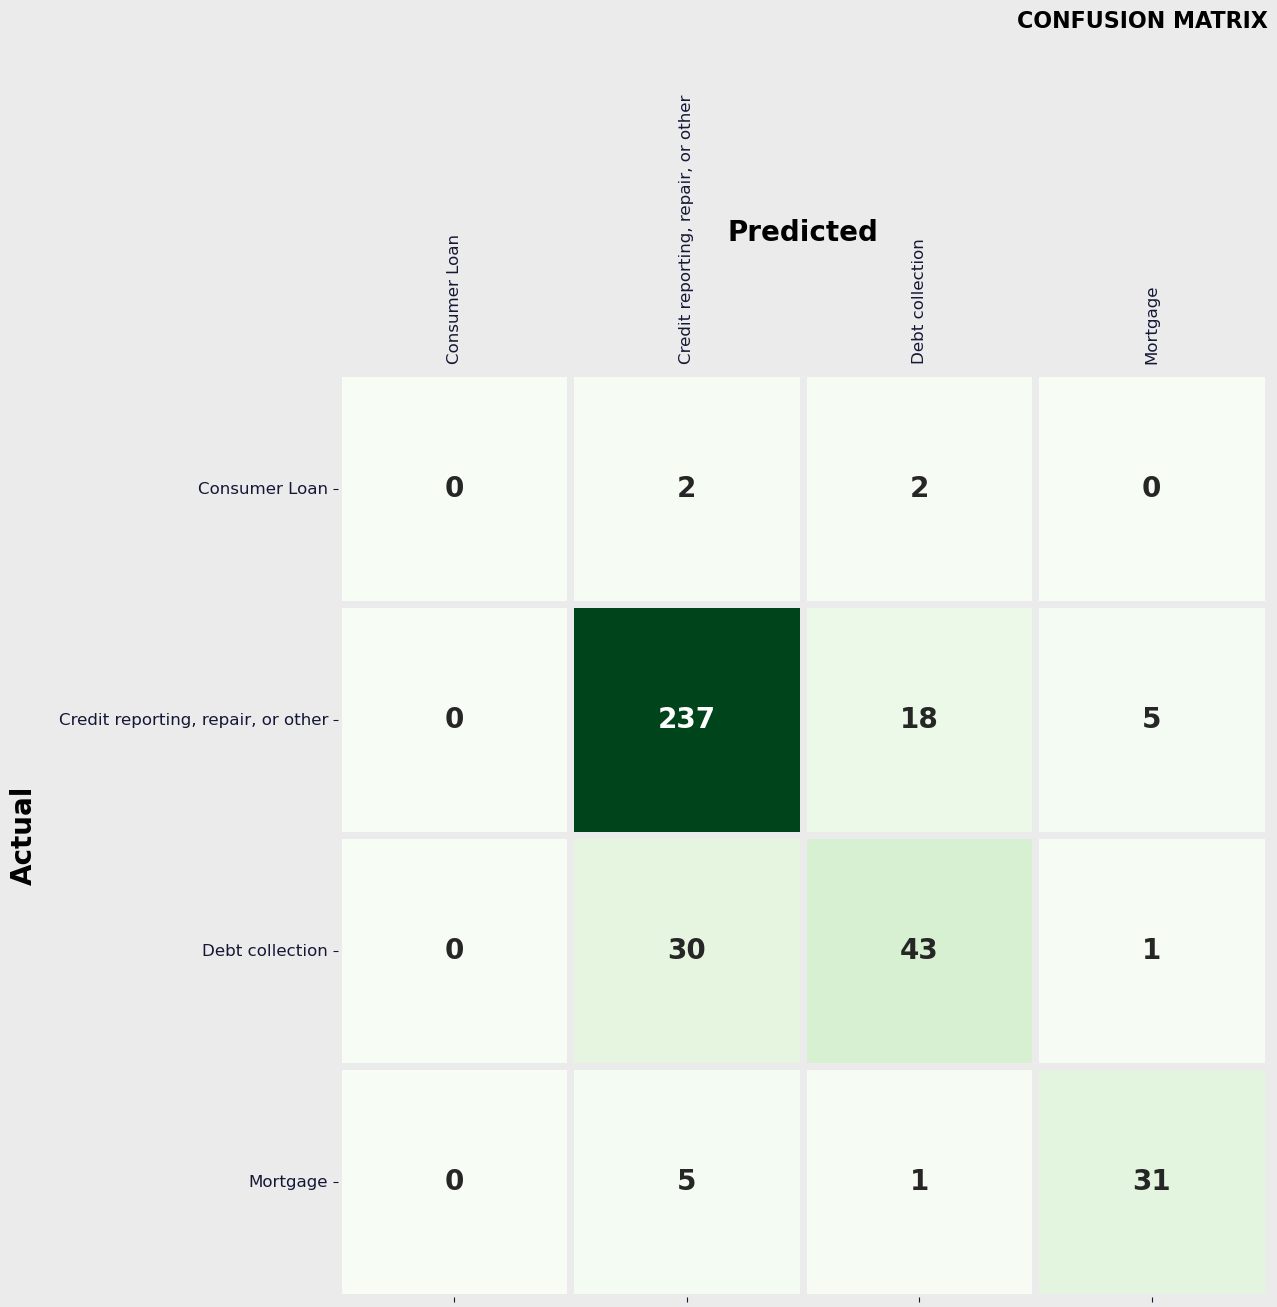

In [32]:
cm = confusion_matrix(y_test, preds1, labels=encoder.classes_)
plot_confusion_matrix(cm=cm,labels=encoder.classes_, size=12, rotate_labels=True)